In [1]:
import os,glob
from astropy.io import fits
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.decomposition import FastICA, PCA

In [6]:
fitslist=glob.glob('Kepler_q1/*llc.fits')
fitslist=fitslist[0:100]

In [32]:
hdu[1].columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E13.6'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; uni

In [33]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]

for i,file in enumerate(fitslist):
    hdu=fits.open(file)
    _time = np.array(hdu[1].data['TIME'])
    _flux = np.array(hdu[1].data['SAP_FLUX'])
    _flux = (_flux-np.nanmean(_flux))/np.nanstd(_flux) #standardize the lightcurve
    nans,x= nan_helper(_flux)
    _flux[nans]= np.interp(x(nans), x(~nans), _flux[~nans]) #impute nans with interprolation
    
    _pdcflux = np.array(hdu[1].data['PDCSAP_FLUX'])
    _pdcflux = (_pdcflux-np.nanmean(_pdcflux))/np.nanstd(_pdcflux) #standardize the lightcurve
    nans,x= nan_helper(_pdcflux)
    _pdcflux[nans]= np.interp(x(nans), x(~nans), _pdcflux[~nans]) #impute nans with interprolation
    
    if i == 0:
        arr_time = _time.reshape((1639, 1))
        arr_flux = _flux.reshape((1639, 1))
        arr_pdcflux = _pdcflux.reshape((1639, 1))
    else:
        arr_time = np.concatenate((arr_time,_time.reshape((1639, 1))),axis=1)
        arr_flux = np.concatenate((arr_flux,_flux.reshape((1639, 1))),axis=1)
        arr_pdcflux = np.concatenate((arr_pdcflux,_pdcflux.reshape((1639, 1))),axis=1)

arr_time = arr_time.T
arr_flux = arr_flux.T
arr_pdcflux = arr_pdcflux.T
#df_time = pd.DataFrame(arr_time)
#df_flux = pd.DataFrame(arr_flux)

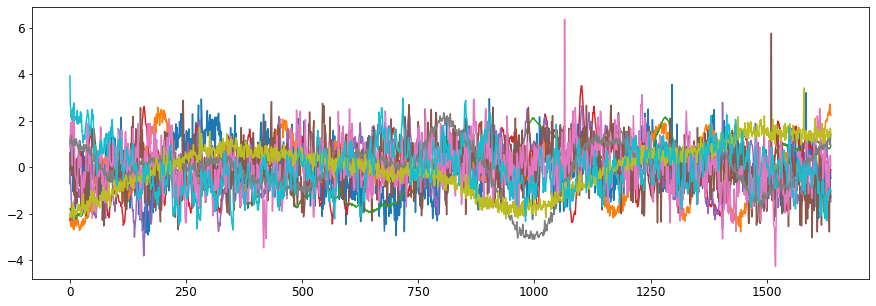

In [34]:
plt.rc('font', size=12)
plt.figure(figsize=(15,5))
for i in random.sample(range(len(fitslist)),10):
    plt.plot(arr_flux[i,0:])


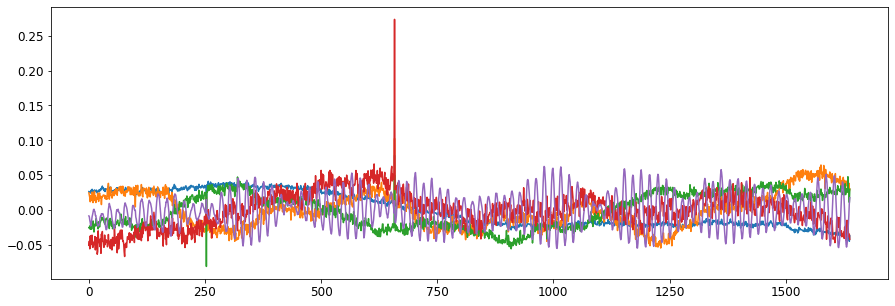

In [9]:
n_com = 5

ica = FastICA(n_components=n_com,max_iter=10000)
ica_com = ica.fit_transform(arr_flux.T)  # Reconstruct signals

plt.rc('font', size=12)
plt.figure(figsize=(15,5))
for i in range(n_com):
    plt.plot(ica_com[0:,i])


In [19]:
n_com = 10
pca = PCA(n_components=n_com)
pca_com = pca.fit_transform(arr_flux.T)

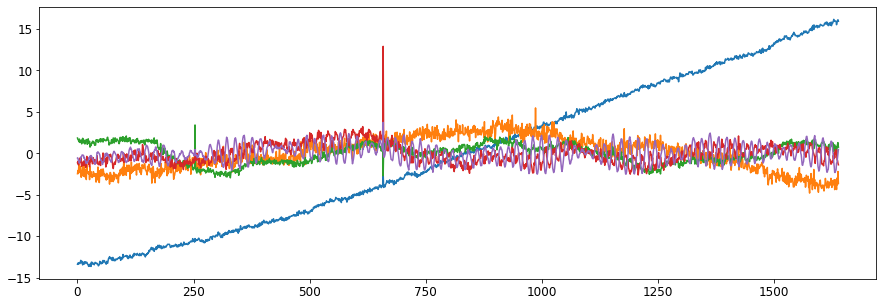

In [30]:
plt.rc('font', size=12)
plt.figure(figsize=(15,5))
for i in range(5):
    plt.plot(pca_com[0:,i])


In [21]:
print(pca.explained_variance_)

[80.385254    3.9734707   1.398733    1.221925    1.1395848   1.0450317
  0.9188011   0.87102234  0.86349744  0.84900695]


[9.3200655 6.2070494 5.0410514 4.4245825 3.0840049 2.6457686 2.3504474
 2.0016696 1.8527572 1.5024891]


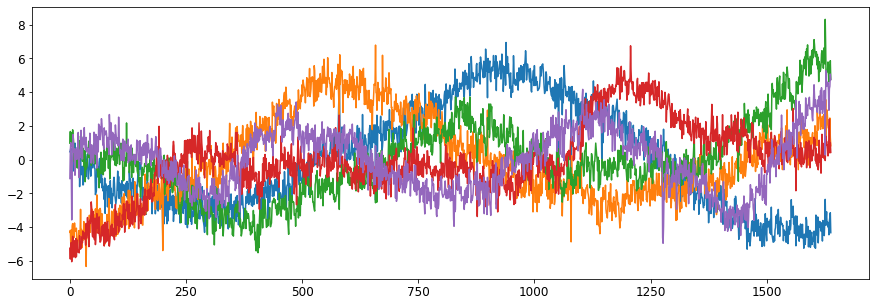

In [35]:
n_com = 10
pca = PCA(n_components=n_com)
pca_com = pca.fit_transform(arr_pdcflux.T)
plt.rc('font', size=12)
plt.figure(figsize=(15,5))
for i in range(5):
    plt.plot(pca_com[0:,i])
print(pca.explained_variance_)